<h1> Projet AXA </h1>

<h2> Raphaël Meudec, Guillaume Richard, Antoine Simoulin </h2>

## Requirement

In [70]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from datetime import datetime
import error_functions as ef
from dateutil import relativedelta
from workalendar.europe import France
# pip install workalendar
import statsmodels.api as sm
import matplotlib as mpl

In [86]:
# colors for plot
blue_light = '#029aed'
orange_med = '#ff5722'
green_light = '#63a600'
gray_light = '#666666'
blue_AXA = '#103184'
red_AXA = '#ff1821'
cal = France()
# set colors for graphs
mpl.rcParams['axes.color_cycle'] = [blue_AXA, red_AXA, gray_light]

In [47]:
# create DataFrame with public holliday in France for years 2011, 2012, 2013, 2014
holiday_map = pd.DataFrame()
for year in [2011,2012,2013,2014]:
    holiday_map_temp = pd.DataFrame(cal.holidays(year))
    holiday_map_temp = holiday_map_temp.set_index([0])
    holiday_map = pd.concat([holiday_map, holiday_map_temp], ignore_index=False)
# holiday_map.head()  

## Loading data

In [48]:
# loading the train data
data = pd.read_csv('data/train.csv', sep=";", parse_dates=['DATE'], index_col = ['DATE'])#, nrows = 3*1e5)
data['DATE'] = data.index
# data.head()

In [49]:
submission = {}
# loading the submission data
for i in range(1,13):
    print(i),
    submission[i] = pd.read_csv('documentation/Submission_data/submission_%i.txt' %i, sep="\t", parse_dates=['DATE'], index_col = ['DATE'])
    submission[i]['DATE'] = submission[i].index
    # print(submission[i].shape)
print('... OK')
# submission.head()

1 2 3 4 5 6 7 8 9 10 11 12 ... OK


## Data transformation

In [93]:
# timestamp exctraction
def splitDatetime(data) :
    datatime = pd.DatetimeIndex(data.DATE)
    data['year'] = datatime.year
    data['month'] = datatime.month
    data['day'] = datatime.day
    data['hour'] = datatime.hour
    data['min'] = datatime.minute
    data['dayweek'] = datatime.weekday
    data['workingday'] = (datatime.weekday < 6).astype(int)
    data['holiday'] = data.index.isin(holiday_map.index).astype(int)
    data['night'] = (datatime.hour < 7).astype(int)
    return data

data = splitDatetime(data)
for i in range(1,13):
    print(i),
    submission[i] = splitDatetime(submission[i])
print('... OK')
# submission.head()
# data.head()

1 2 3 4 5 6 7 8 9 10 11 12 ... OK


### Features definition

In [118]:
def format_label():
    # pivot table on data for ASS_ASSIGNMENT columnwise
    X = pd.DataFrame()
    X = data[['year','month','day','hour','ASS_ASSIGNMENT','CSPL_CALLS','min','DATE']]
    df1 = X.pivot_table(index = ['DATE'], columns = ['ASS_ASSIGNMENT'], values = ['CSPL_CALLS'], aggfunc=np.sum)
    # print(df1.shape)
    # when data for this date an categorie not available, fill with 0
    df1.fillna(0, inplace=True)
    # df1.head()

    # creating labels, ASS_ASSIGNMENT are presented columnwise thanks to pivot table above
    y_df = pd.DataFrame()
    for cat in data.ASS_ASSIGNMENT.unique() :
        y_df[cat] = df1['CSPL_CALLS'][cat]
    y_df.head()
    
    return y_df
    
y_df = format_label()

### Decomposition Trend/Season

inferred freq : None
used freq : 336


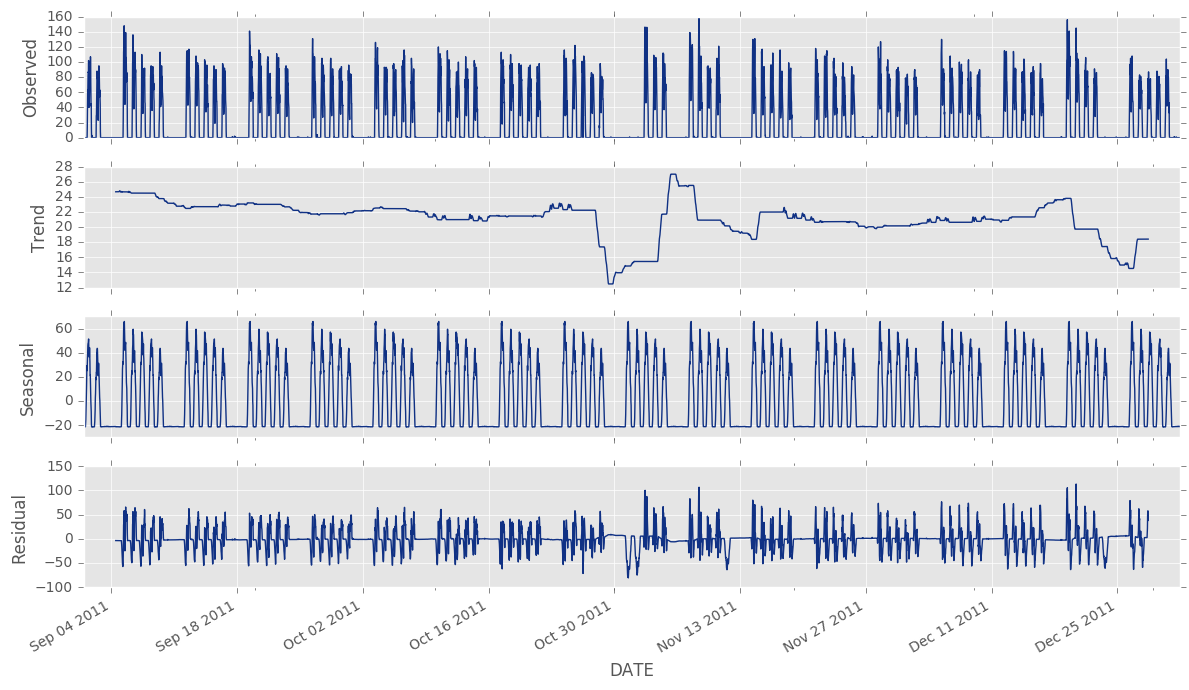

In [87]:
# trying to infer frequence (not working)
inferred_freq = y_df.index.inferred_freq
used_freq = 336
print('inferred freq : %s' %inferred_freq)
print('used freq : %s' %used_freq)


# seasonal decomposition
y_df.Nuit.interpolate(inplace=True)
decomposition = sm.tsa.seasonal_decompose(y_df['2011-09':'2011-12'].CAT, freq=used_freq)

# trend = decomposition.trend
# seasonal = decomposition.seasonal 
# residual = decomposition.resid 

# plot trend, season, resid
fig = decomposition.plot()
fig.set_size_inches(12, 7)
fig.tight_layout()
plt.style.use('ggplot')
plt.show()

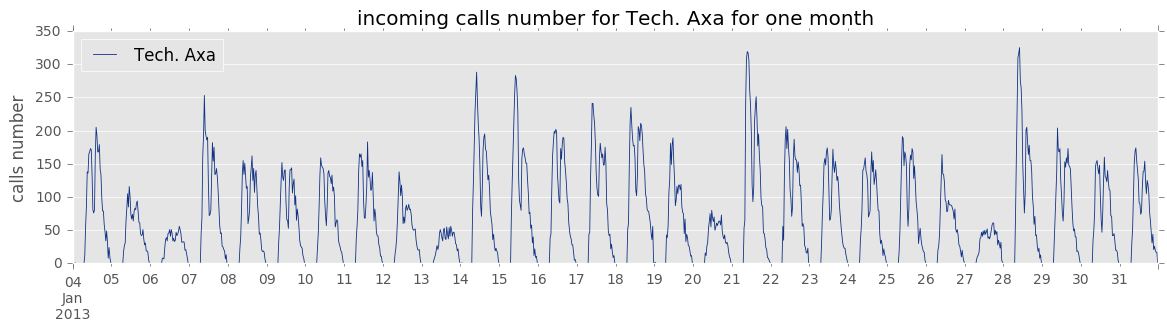

In [53]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = y_df['Tech. Axa']['2013-01'].plot(color=blue_AXA,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('calls number')
plt.legend(['Tech. Axa'],loc='best')
plt.title('incoming calls number for %s for one month' %'Tech. Axa')
plt.xlabel('')
plt.show()
fig.savefig('plots/appels_categorie_%s_month.png' %('Tech. Axa'),bbox_inches='tight')

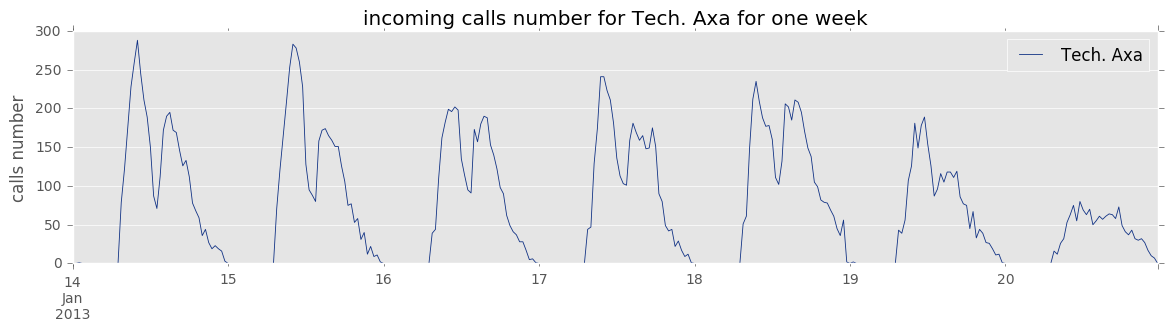

In [54]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = y_df['Tech. Axa']['2013-01-14':'2013-01-20'].plot(color=blue_AXA,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('calls number')
plt.legend(['Tech. Axa'],loc='best')
plt.title('incoming calls number for %s for one week' %'Tech. Axa')
plt.xlabel('')
plt.show()
fig.savefig('plots/appels_categorie_%s_week.png' %('Tech. Axa'),bbox_inches='tight')

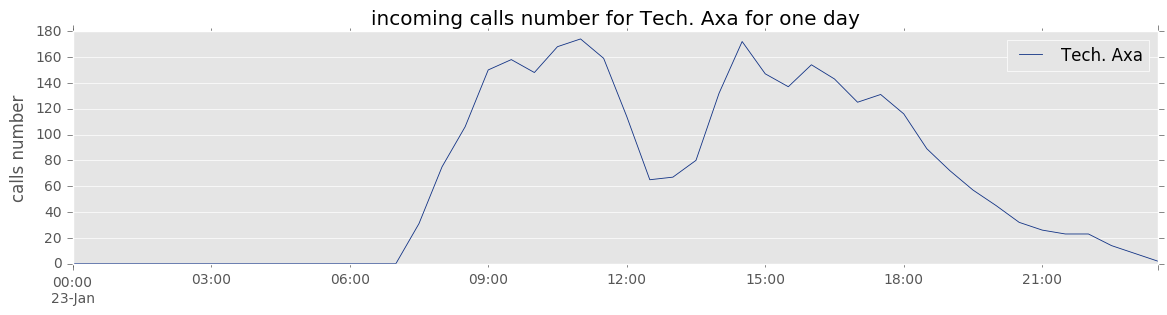

In [55]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = y_df['Tech. Axa']['2013-01-23'].plot(color=blue_AXA,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('calls number')
plt.legend(['Tech. Axa'],loc='best')
plt.title('incoming calls number for %s for one day' %'Tech. Axa')
plt.xlabel('')
plt.show()
fig.savefig('plots/appels_categorie_%s_day.png' %('Tech. Axa'),bbox_inches='tight')

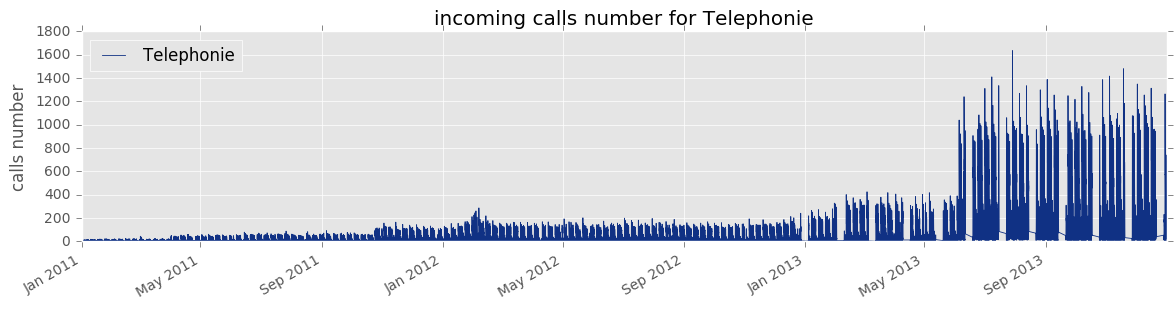

In [56]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = y_df['Téléphonie'].plot(color=blue_AXA,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('calls number')
plt.legend(['Telephonie'],loc='best')
plt.title('incoming calls number for %s' %'Telephonie')
plt.xlabel('')
plt.show()
fig.savefig('plots/appels_categorie_%s.png' %('Telephonie'),bbox_inches='tight')

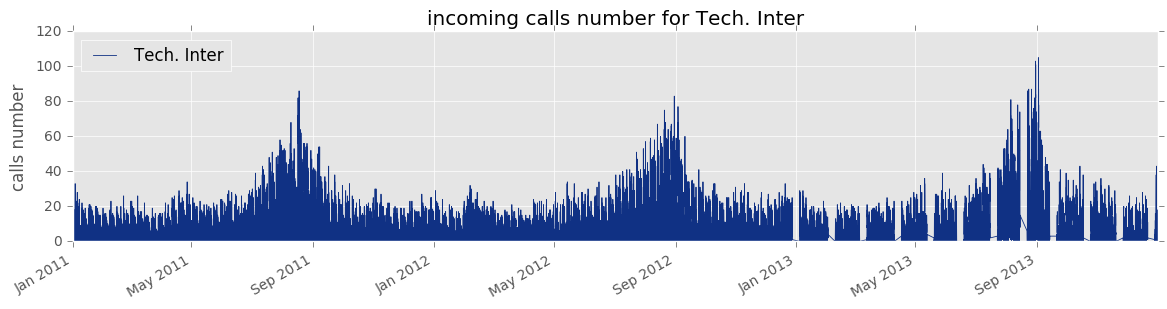

In [88]:
fig = plt.figure(figsize=[14,3])
plt.style.use('ggplot')
plot_cat = y_df['Tech. Inter'].plot(color=blue_AXA,linewidth=.6)
#plot_registered = X['CSPL_ACDCALLS'][periode].plot(color=blue_light,linewidth=.6)
#plot_casual = X['CSPL_ABNCALLS'][periode].plot(color=green_light,linewidth=.6)
plt.ylabel('calls number')
plt.legend(['Tech. Inter'],loc='best')
plt.title('incoming calls number for %s' %'Tech. Inter')
plt.xlabel('')
plt.show()
fig.savefig('plots/appels_categorie_%s.png' %('Tech. Inter'),bbox_inches='tight')

### Saving plots

In [92]:
for cat in data.ASS_ASSIGNMENT.unique() :
    fig = plt.figure(figsize=[14,3])
    plt.style.use('ggplot')
    plot_cat = y_df[cat].plot(color=blue_AXA,linewidth=.6)    
    plt.ylabel('calls number')
    plt.legend([cat.decode('utf-8')],loc='best')
    plt.title('incoming calls number for %s' %cat.decode('utf-8'))
    plt.xlabel('')
    fig.savefig('plots/global/appels_categorie_%s.png' %(cat.decode('utf-8')), bbox_inches='tight')
    plt.close(fig)

### Features definition

In [58]:
def format_subission(submission):
    
    # formating submission data
    X_test = pd.DataFrame(index = submission.index)
    X_test['DATE'] = submission.index
    X_test = splitDatetime(X_test)
    X_test.drop('DATE', axis=1, inplace=True)
    X_test = X_test.drop_duplicates()

    date_min_test = X_test.index.min()
    date_max_test = X_test.index.max()
    X_test_range = relativedelta.relativedelta(date_max_test, date_min_test)

    # print submission data total range
    print('test data first date : %s' %date_min_test)
    print('test data last date  : %s' %date_max_test)
    print('test data range : %s years, %s months and %s days\n' %(X_test_range.years, X_test_range.months,X_test_range.days))
    # X_test.head()
    
    return X_test

# X_test = format_subission()

In [107]:
def format_train(y_df):
    
    # formatting train data
    X_train = pd.DataFrame(index = y_df.index)
    X_train['DATE'] = y_df.index
    X_train = splitDatetime(X_train)
    X_train.drop('DATE', axis=1, inplace=True)
    
    date_min = X_train.index.min()
    date_max = X_train.index.max()
    X_train_range = relativedelta.relativedelta(date_max, date_min)

    # print train data range
    print('train data first date : %s' %date_min)
    print('train data last date  : %s' %date_max)
    print('train data range : %s years, %s months and %s days\n' %(X_train_range.years, X_train_range.months,X_train_range.days))
    # X_train.head()
    
    return X_train

In [116]:
X_train = format_train(y_df)

train data first date : 2011-01-01 00:00:00
train data last date  : 2013-12-31 23:30:00
train data range : 2 years, 11 months and 30 days



### Cross validation split

In [96]:
# function to split data for CV purposes
# algorithm is test on last week of the randomly choosen train data set

def split_data(X_train):
    
    X_train_split = X_train
    # the subset contain at leat 50% of the original data
    s = np.random.uniform(X_train_split.shape[0]/2,X_train_split.shape[0],1).astype(int)
    X_train_split.drop(X_train_split.index[s:], inplace=True)

    date_min = X_train.index.min()
    date_max = X_train.index.max()
    X_train_range = relativedelta.relativedelta(date_max, date_min)

    # print subset range
    print('train data first date : %s' %date_min)
    print('train data last date  : %s' %date_max)
    print('train data range : %s years, %s months and %s days\n' %(X_train_range.years, X_train_range.months,X_train_range.days))
    # X_train.head()
    
    # Last week of the subset is used for cross validation purposes
    X_train_split_CV = X_train_split.last('7d')
    date_min_CV = X_train_split_CV.index.min()
    date_max_CV = X_train_split_CV.index.max()
    X_CV_range = relativedelta.relativedelta(date_max_CV, date_min_CV)

    # print CV subset week range
    print('CV data first date : %s' %date_min_CV)
    print('CV data last date  : %s' %date_max_CV)
    print('CV data range : %s years, %s months and %s days' %(X_CV_range.years, X_CV_range.months,X_CV_range.days))
    # X_train_CV.head()
    
    return X_train_split, X_train_split_CV


### Removing data anterior to prediction

In [97]:
def remove_ant(X_train, X_test, y_df):

    # removing data from train set anterior to data of the submission file
    date_min_test = X_test.index.min()
    X_train = X_train.truncate(after=date_min_test)
    y_df = y_df.truncate(after=date_min_test)

    date_min = X_train.index.min()
    date_max = X_train.index.max()
    X_train_range = relativedelta.relativedelta(date_max, date_min)

    # printing range of data after removing non-causal data
    print('train data first date : %s' %date_min)
    print('train data last date  : %s' %date_max)
    print('train data range : %s years, %s months and %s days\n' %(X_train_range.years, X_train_range.months,X_train_range.days))
    
    return X_train, y_df

### Adding features from last week

/!\ function can take a few min to execute !!

In [98]:
def add_features(X_train, y_df):
    
    # Set number of hours prediction is in advance
    n_periods_advance = 336

    # Set number of historic hours used
    n_periods_window = 1

    for cat in y_df:
        if cat not in ['Evenements','Gestion Amex']:
            for k in range(n_periods_advance,n_periods_advance+n_periods_window):
                # X_test['%s_t-%i'%(cat.decode('utf-8'),k)] = y_df[cat].shift(k*30, freq='min')
                X_train['%s_t-%i'%(cat.decode('utf-8'),k)] = y_df[cat].shift(k, freq='min')

    # remove raw following week without data
    y_df.drop(X_train[pd.isnull(X_train).any(axis=1)].index, inplace=True)
    X_train.drop(X_train[pd.isnull(X_train).any(axis=1)].index, inplace=True)

    return X_train, y_df

#X_train, y_df = add_features()

## Feature extractor

In [63]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre

class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_df):
        pass
    
    def transform(self, X_df):
        return X_df

## Regressor (choose among the three)

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
import xgboost as xgb
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest

#from xgboost import plot_importance

class Regressor(BaseEstimator):
    def __init__(self):
        
        self.n_components = 20
        pca = PCA(n_components=self.n_components)
        selection = SelectKBest(k = 5)
        combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])
        
        self.reg = Pipeline([
            #('cf', combined_features),
            #('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.2,
                subsample = 0.9,
            ))
        ])

    def fit(self, X, y):
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)
    
    def predict_proba(self, X):
        return self.reg.predict_proba(X)
    
    def grid_search_fit(self, X, y):
        y = y.astype(float)
        # use a full grid over all parameters
        param_grid = dict(
            # pca__n_components = [10,20,40],
            xgb__max_depth = [3,10,2],#[10,11,9]#[9,10,11],#
            xgb__min_child_weight = [1,6,2],
            # xgb__gamma = [i/10.0 for i in range(0,5)]
            # xgb__subsample = [i/10.0 for i in range(6,10)],
            # xgb__colsample_bytree = [i/10.0 for i in range(6,10)]
            )

        param_grid_rfr = dict(
            max_leaf_nodes = [9,10,11],
            max_depth = [3, None],
            max_features = [1, 3, 10],
            min_samples_split = [3, 10],
            min_samples_leaf = [1, 3, 10],
            bootstrap = [True, False]
            )

        # error definition
        linex = make_scorer(ef.linex_loss, greater_is_better = False)

        grid_search = GridSearchCV(self.reg, param_grid = param_grid, scoring = linex)#, verbose = 10)

        # fit gridsearch
        self.reg = grid_search.fit(X, y)

        print('Grid search  best score: %.3f' % grid_search.best_score_)
        print('Grid search  best params:')
        for k, v in sorted(grid_search.best_params_.items()):
            print("\t%s: %r" % (k, v))
        # get best estimator
        self.reg = grid_search.best_estimator_

from sklearn.base import BaseEstimator
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

class Regressor(BaseEstimator):
    def __init__(self):
        
        self.n_components = 40
        
        self.reg_day = Pipeline([
            ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.2,
                subsample = 0.9,
            ))
        ])
        
        self.reg_night = Pipeline([
            ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.2,
                subsample = 0.9,
            ))
        ])
        
        # self.reg_day = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 2, min_child_weight = 1, gamma = 0.2, subsample = 0.9)
        # self.reg_night = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 2, min_child_weight = 1, gamma = 0.2, subsample = 0.9)

    def fit(self, X, y):
        is_day = np.array(X.night == 0)
        self.reg_day.fit(X[is_day], y[is_day])
        self.reg_night.fit(X[~is_day], y[~is_day])

    def predict(self, X, cat):
        is_day = np.array(X.night == 0)
        res = np.zeros(X.shape[0])
        
        # to write submission file, X size = 1
        # Specific case to avoid array of bool beeing interpreted as bool
        if (is_day.size == 1):
            if is_day:
                res = self.reg_day.predict(X)
            if ~is_day:
                res = self.reg_night.predict(X)
        else:     
            day_pred = self.reg_day.predict(X[is_day])
            night_pred = self.reg_night.predict(X[~is_day])
            res[is_day] = day_pred
            res[~is_day] = night_pred
            
        return res
    
    def predict_proba(self, X):
        return self.reg.predict_proba(X)
    
    def grid_search_fit(self, X, y):
        param_grid = dict(
            xgb__n_estimators = [100, 200, 400],
            xgb__learning_rate = [i/10.0 for i in range(0,5)]
            # pca__n_components = [10,20,40],
            # xgb__max_depth = [3,10,2],#[10,11,9]#[9,10,11],#
            # xgb__min_child_weight = [1,6,2],
            # xgb__gamma = [i/10.0 for i in range(0,5)]
            # xgb__subsample = [i/10.0 for i in range(6,10)],
            # xgb__colsample_bytree = [i/10.0 for i in range(6,10)]
            )

        # error definition
        linex = make_scorer(ef.linex_loss, greater_is_better = False)
        
        # perform grid search
        grid_search_day = GridSearchCV(self.reg_day, param_grid = param_grid, scoring = linex)#, verbose = 10)
        grid_search_night = GridSearchCV(self.reg_night, param_grid = param_grid, scoring = linex)#, verbose = 10)

        # fit gridsearch
        is_day = np.array(X.night == 0)
        self.reg_day = grid_search_day.fit(X[is_day], y[is_day])
        self.reg_night = grid_search_night.fit(X[~is_day], y[~is_day])

        print('\t Grid search day best score: %.3f' % grid_search_day.best_score_)
        print('\t Grid search day best params:')
        for k, v in sorted(grid_search_day.best_params_.items()):
            print("\t \t%s: %r" % (k, v))
        # get best estimator
        self.reg_day = grid_search_day.best_estimator_
        
        print('\t Grid search night best score: %.3f' % grid_search_night.best_score_)
        print('\t Grid search night best params:')
        for k, v in sorted(grid_search_night.best_params_.items()):
            print("\t \t%s: %r" % (k, v))
        # get best estimator
        self.reg_day = grid_search_night.best_estimator_

 def grid_search_fit(self, X, y):
        param_grid = dict(
            xgb__n_estimators = [100, 200, 400],
            xgb__learning_rate = [i/10.0 for i in range(0,5)],
            # pca__n_components = [10,20,40],
            xgb__max_depth = [3,10,2],#[10,11,9]#[9,10,11],#
            # xgb__min_child_weight = [1,6,2],
            # xgb__gamma = [i/10.0 for i in range(0,5)]
            # xgb__subsample = [i/10.0 for i in range(6,10)],
            # xgb__colsample_bytree = [i/10.0 for i in range(6,10)]
            )

        # error definition
        linex = make_scorer(ef.linex_loss, greater_is_better = False)

        # perform grid search
        grid_search_high = GridSearchCV(self.reg_high, param_grid = param_grid, scoring = linex)#, verbose = 10)
        grid_search_high_2 = GridSearchCV(self.reg_high_2, param_grid = param_grid, scoring = linex)#, verbose = 10)

        # fit gridsearch
        is_high = np.array(y > 200)
        is_high_2 = np.array(y > 800)
        self.reg_high = grid_search_high.fit(X[is_high], np.log(y[is_high]))
        self.reg_high_2 = grid_search_high_2.fit(X[is_high_2], np.log(y[is_high_2]))

        print('\t Grid search high best score: %.3f' % grid_search_high.best_score_)
        print('\t Grid search high best params:')
        for k, v in sorted(grid_search_high.best_params_.items()):
            print("\t \t%s: %r" % (k, v))
        # get best estimator
        self.reg_high = grid_search_high_2.best_estimator_

        print('\t Grid search high_2 best score: %.3f' % grid_search_high_2.best_score_)
        print('\t Grid search high_2 best params:')
        for k, v in sorted(grid_search_high_2.best_params_.items()):
            print("\t \t%s: %r" % (k, v))
        # get best estimator
        self.reg_high_2 = grid_search_high_2.best_estimator_

In [124]:
from sklearn.base import BaseEstimator
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

class Regressor(BaseEstimator):
    def __init__(self):
        
        self.n_components = 40
        self.reg_std = Pipeline([
            # ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.2,
                subsample = 0.9,
            ))
        ])
        
        self.reg_high = Pipeline([
            # ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.1,
                subsample = 0.9,
            ))
        ])

        self.reg_high_2 = Pipeline([
            # ('pca', PCA(n_components = self.n_components)),
            ('xgb', xgb.XGBRegressor(
                learning_rate = 0.1,
                n_estimators = 100,
                max_depth = 2,
                min_child_weight = 1,
                gamma = 0.1,
                subsample = 0.9,
            ))
        ])
        
    def fit(self, X, y):
        is_high = np.array(y > 200)
        is_high_2 = np.array(y > 1100)
        self.reg_std.fit(X, y)
        if any(is_high):
            self.reg_high.fit(X[is_high], np.log(y[is_high]))
        if any(is_high_2):
            self.reg_high_2.fit(X[is_high_2], np.log(y[is_high_2]))

    def predict(self, X, cat):
        res = np.zeros(X.shape[0])
        res = self.reg_std.predict(X)
        if cat in ['CAT', 'Tech. Axa','Téléphonie']:
            # print('(using specific module for high values)')
            is_high = res > 150
            if any(is_high):
                res[is_high] = np.exp(self.reg_high.predict(X[is_high]))
            is_high_2 = res > 1050
            if any(is_high_2):
                res[is_high_2] = np.exp(self.reg_high.predict(X[is_high_2]))
        return res
    
    def predict_proba(self, X):
        return self.reg.predict_proba(X)

## Cross validation Module

train data first date : 2011-01-01 00:00:00
train data last date  : 2013-12-31 23:30:00
train data range : 2 years, 11 months and 30 days

train data first date : 2011-01-01 00:00:00
train data last date  : 2012-08-06 00:00:00
train data range : 1 years, 7 months and 5 days

CV data first date : 2012-07-30 00:30:00
CV data last date  : 2012-08-06 00:00:00
CV data range : 0 years, 0 months and 6 days
error Téléphonie = 15902.0
error RTC = 5.2
error Gestion Renault = 0.0
error Nuit = 53.5
error Gestion - Accueil Telephonique = 7.4
error Regulation Medicale = 1.9
error Services = 44.9
error Tech. Total = 141.4
error Gestion Relation Clienteles = 0.3
error Crises = 0.0
error Japon = 5.7
error Médical = 26.6
error Gestion Assurances = 1.3
error Domicile = 32.1
error Gestion = 0.0
error SAP = 2.1
error RENAULT = 16.4
error Tech. Inter = 331.1
error Gestion Clients = 0.4
error Manager = 0.3
error Tech. Axa = 7936.7
error CAT = 2470.9
error Gestion DZ = 0.0
error Mécanicien = 1.2
error CMS = 0

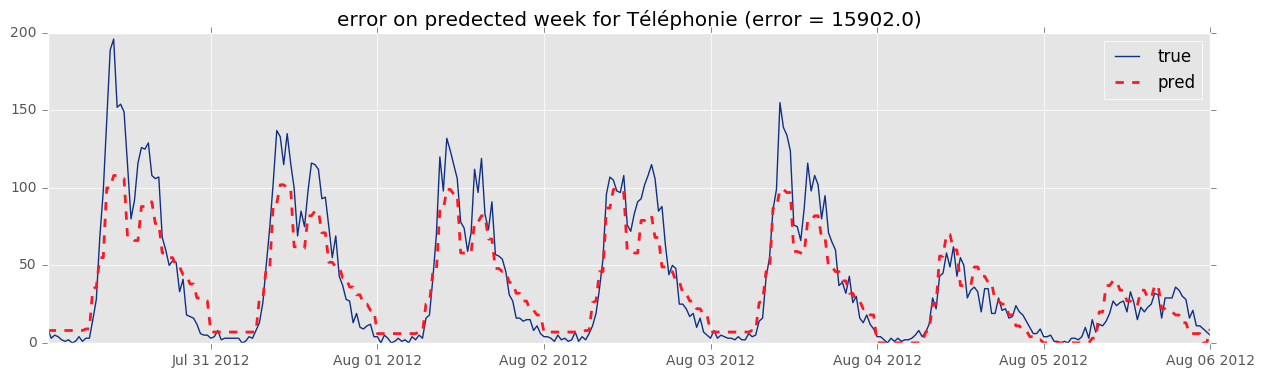

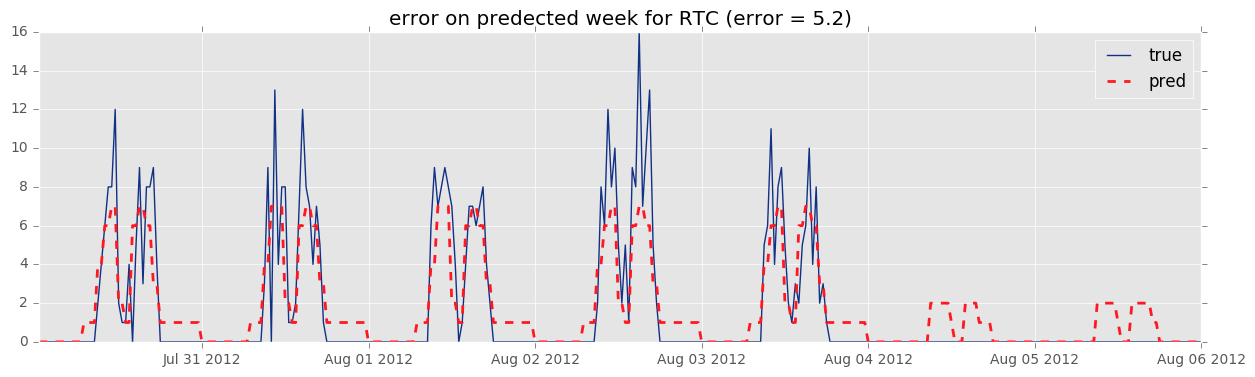

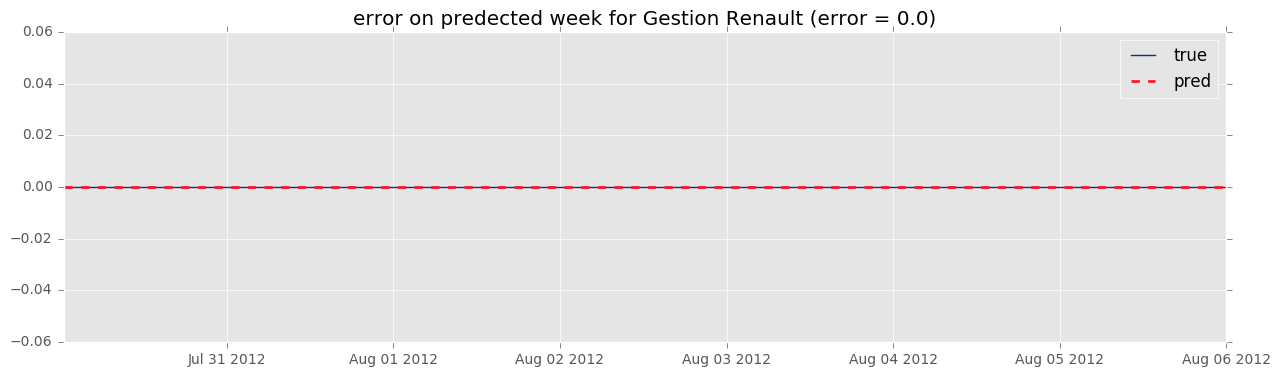

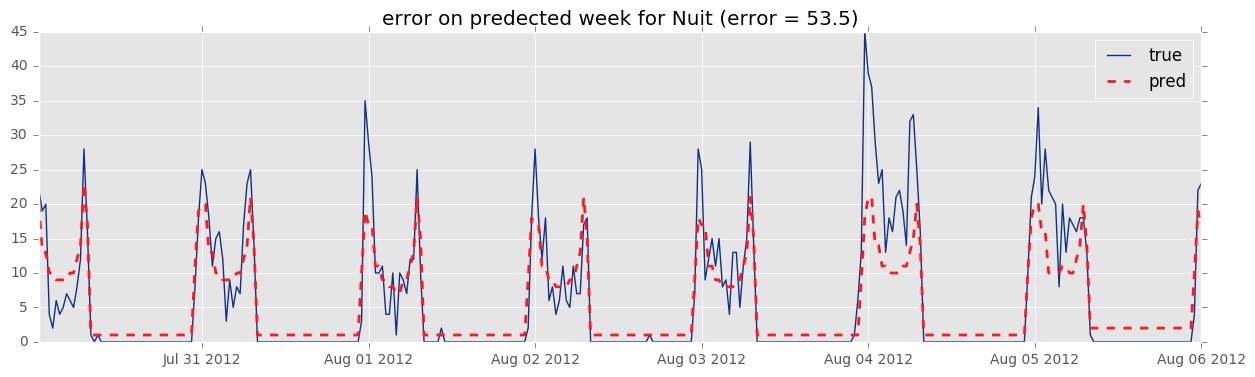

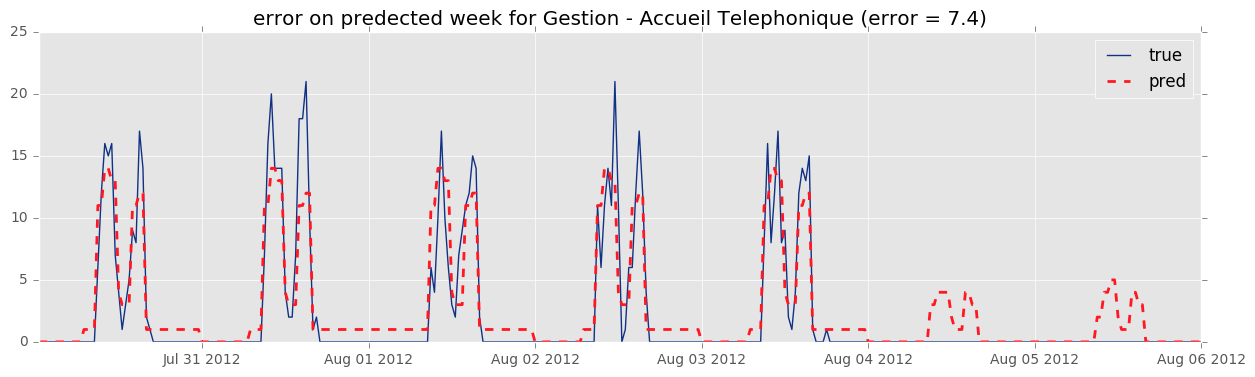

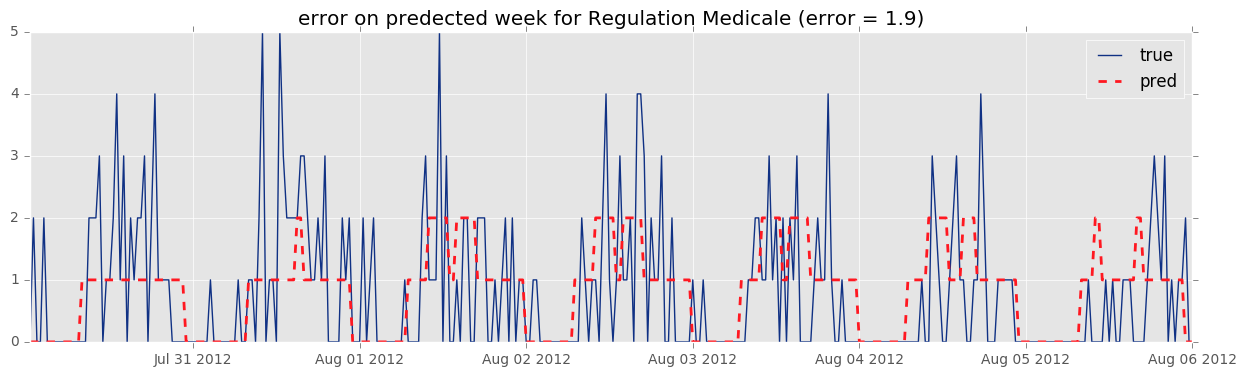

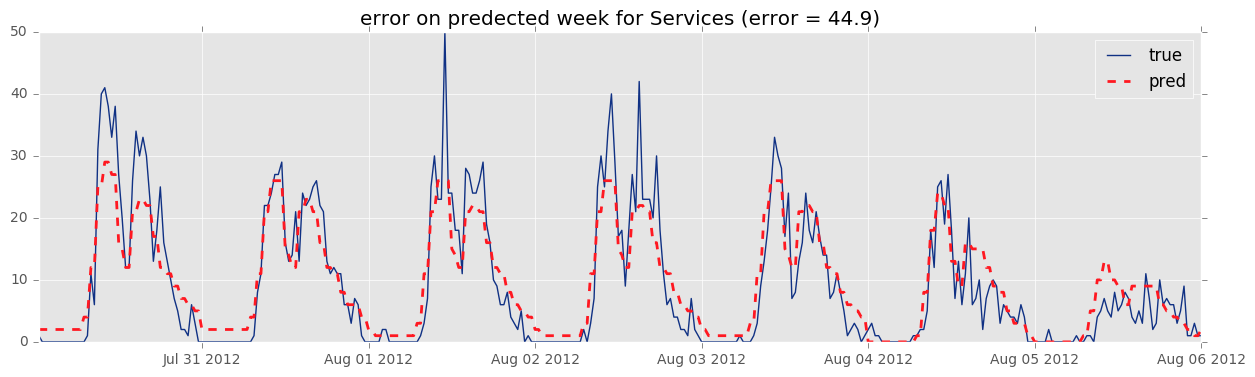

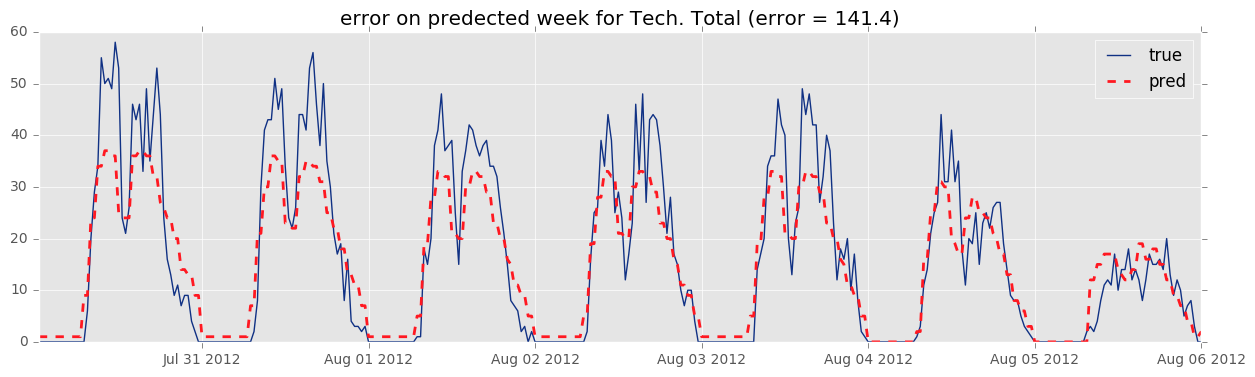

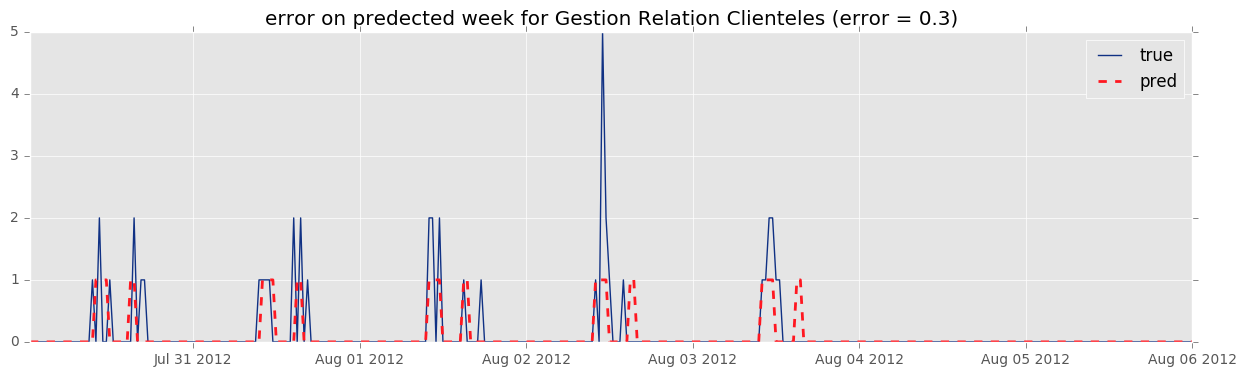

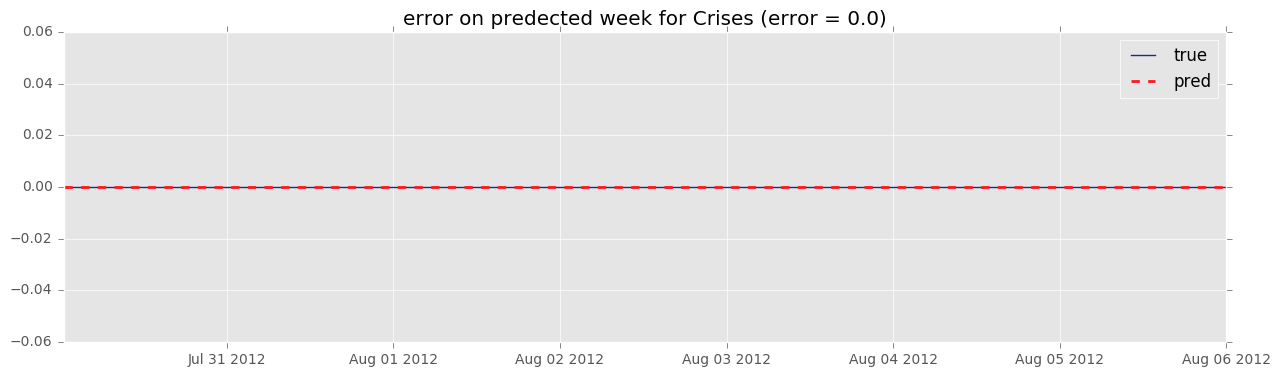

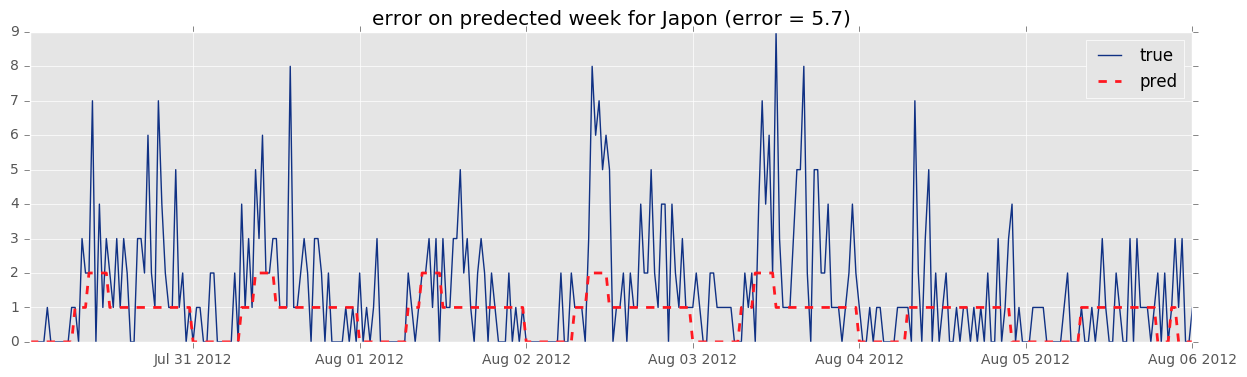

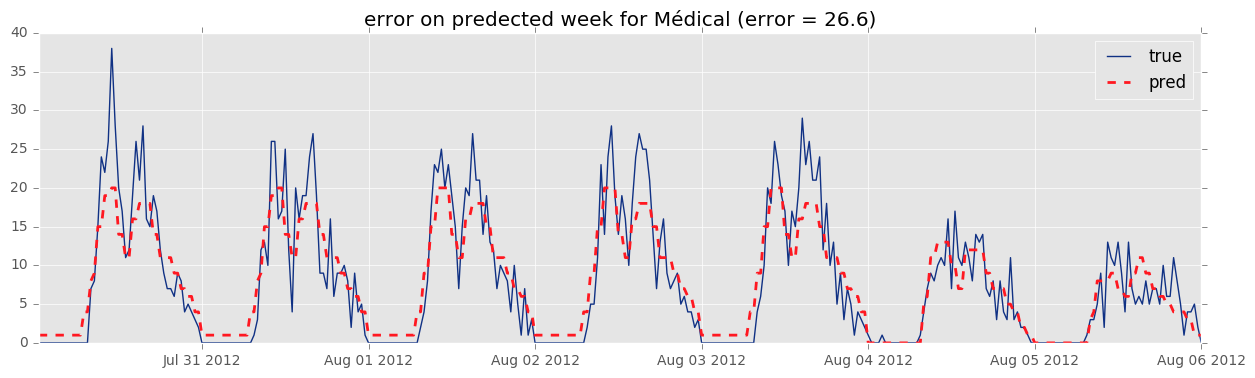

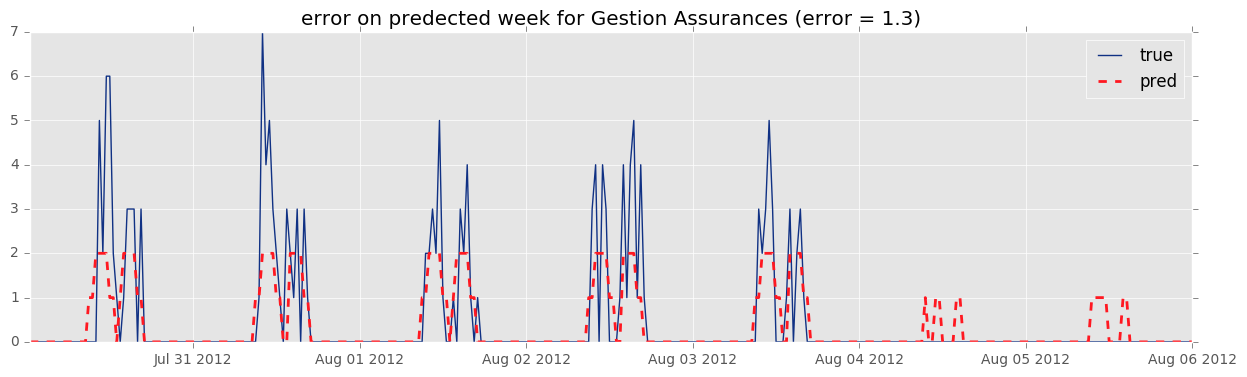

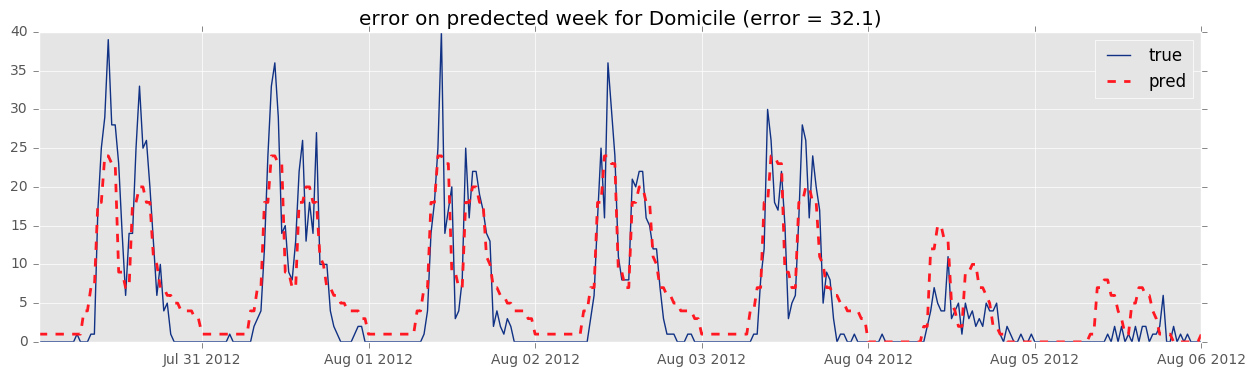

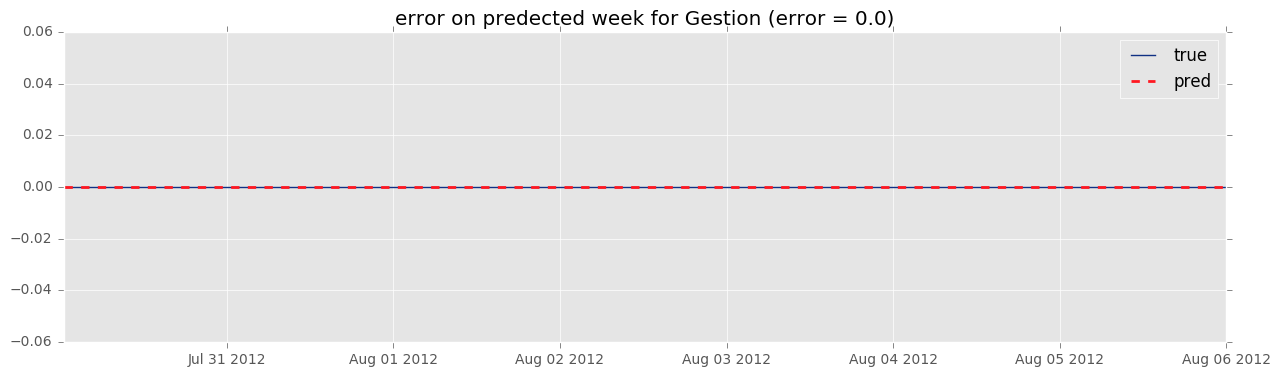

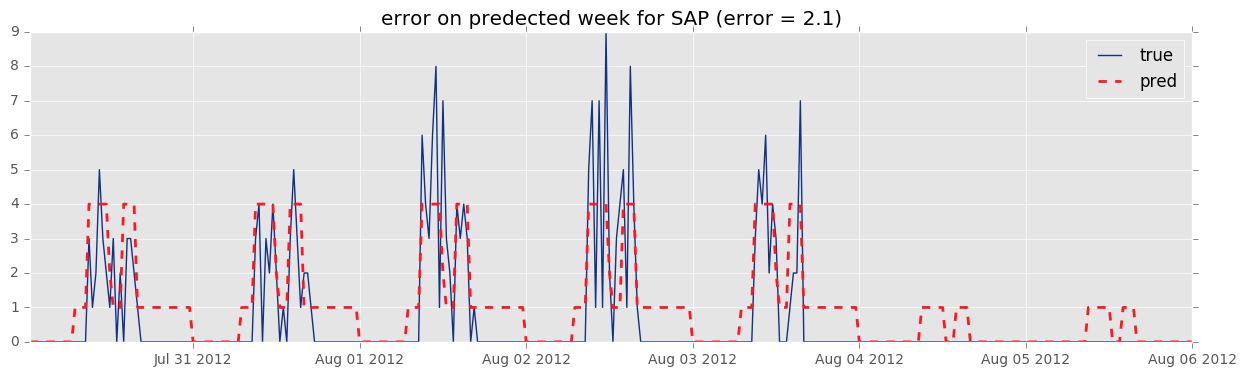

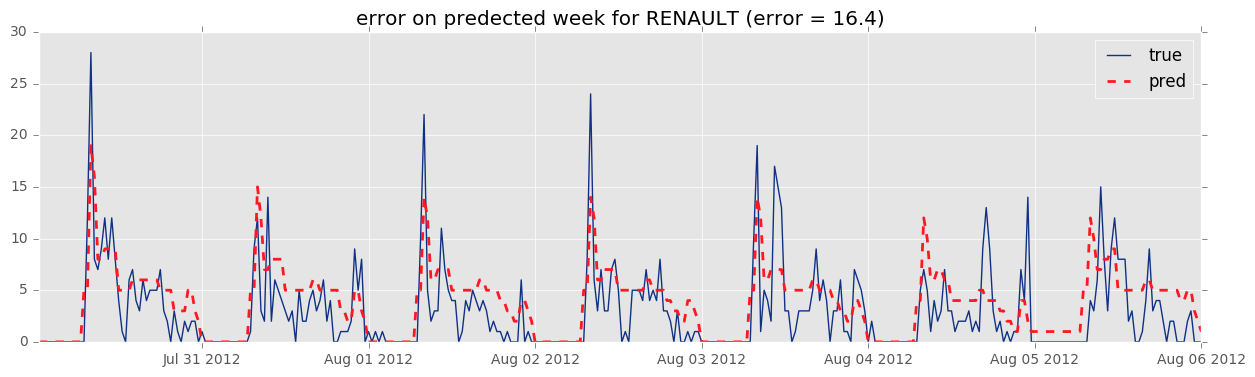

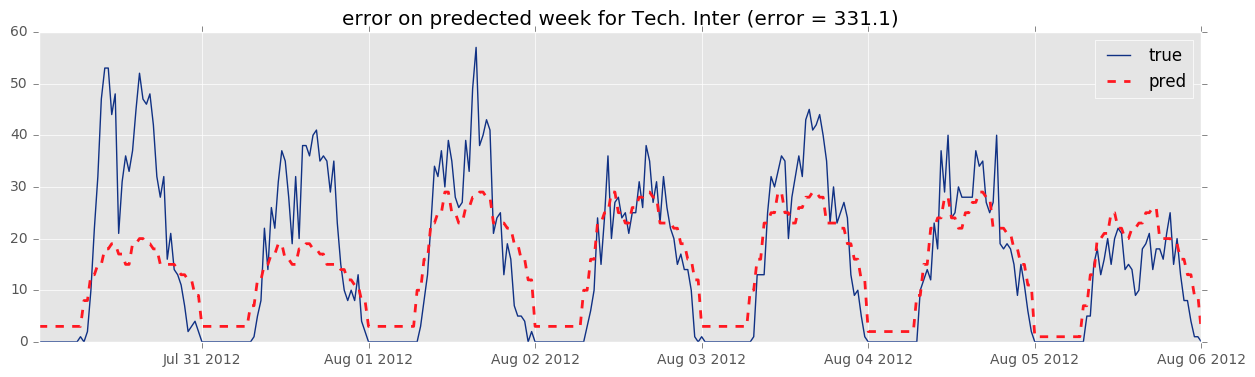

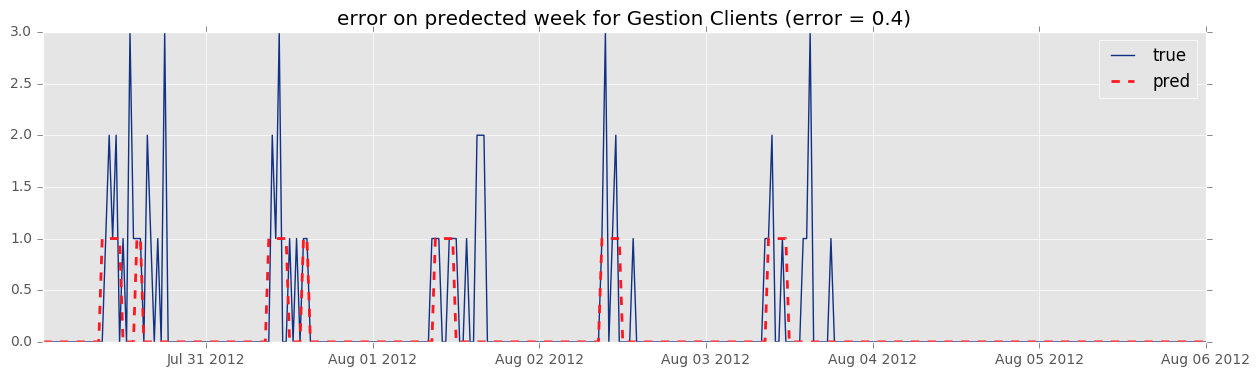

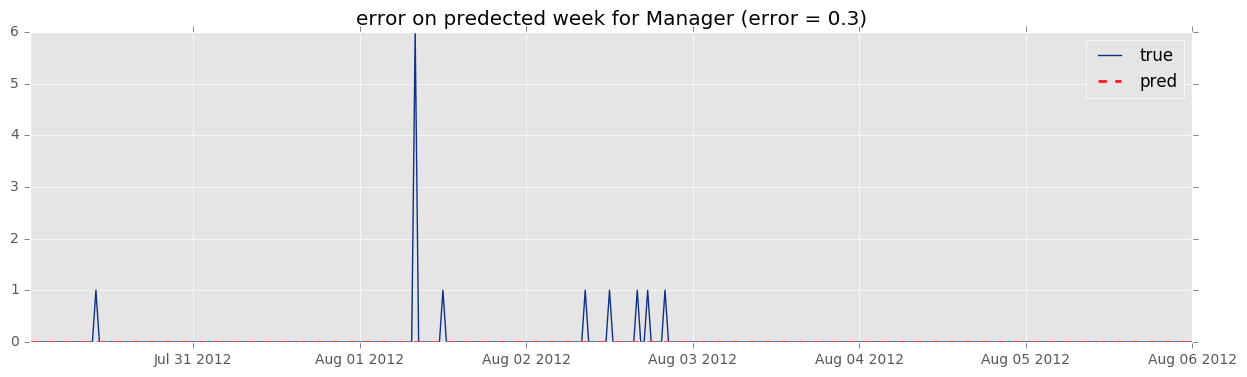

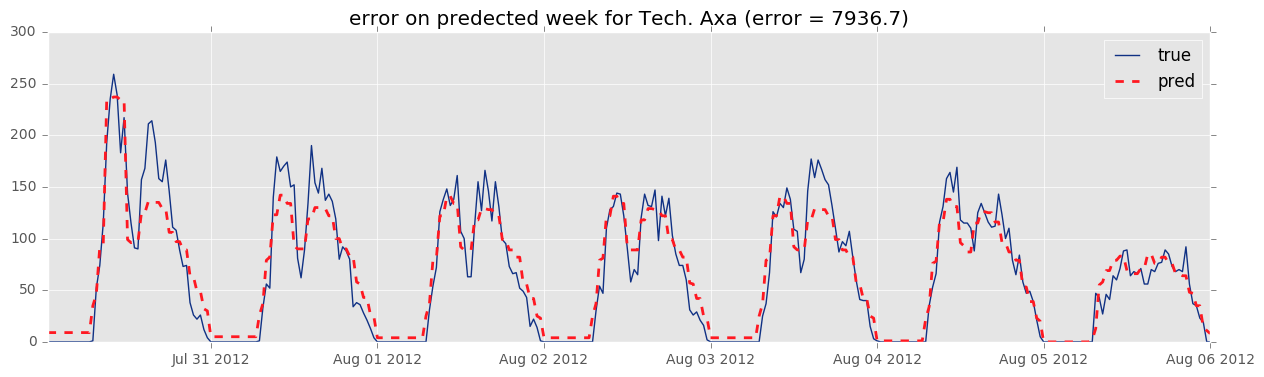

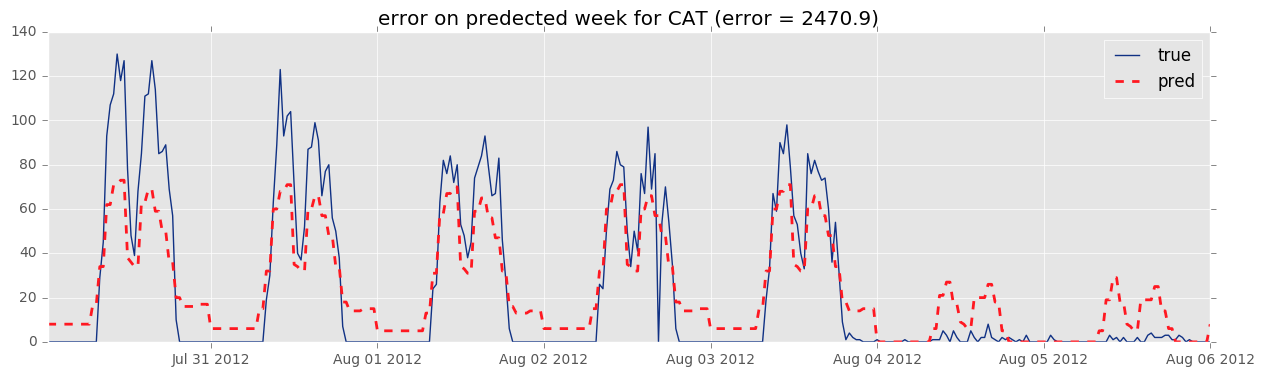

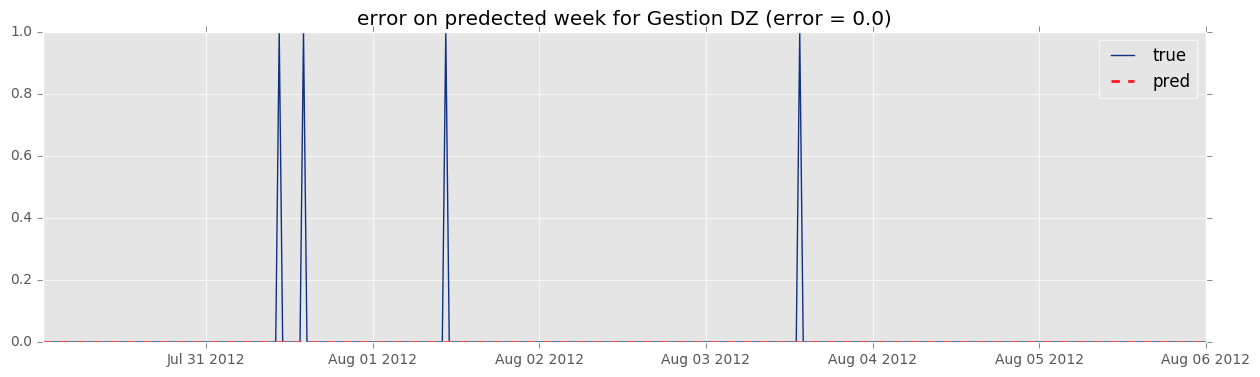

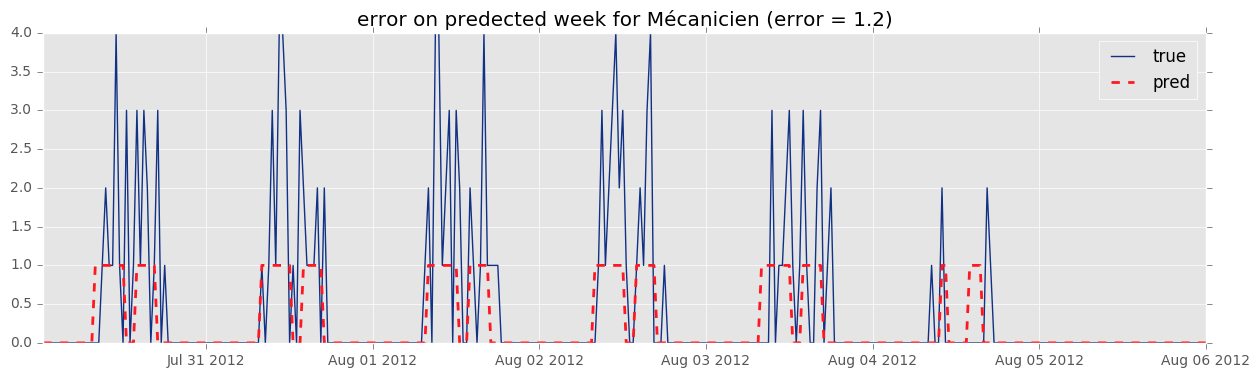

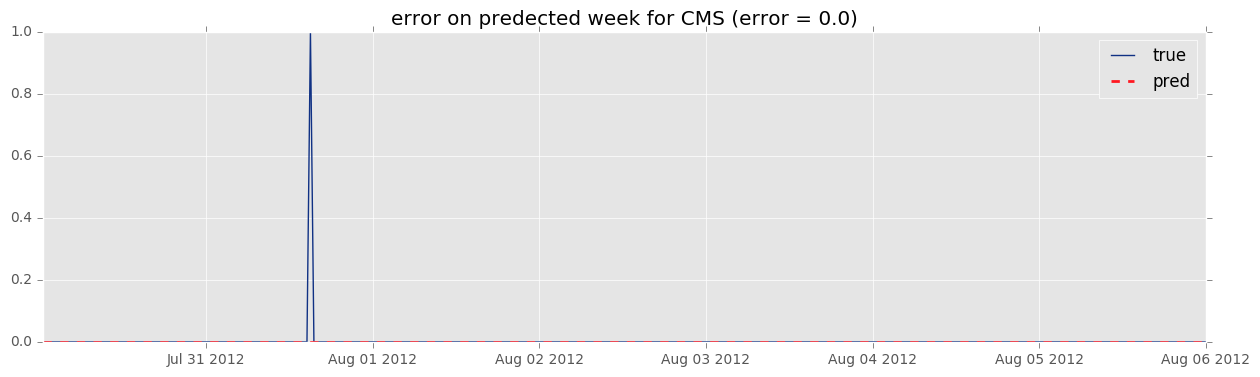

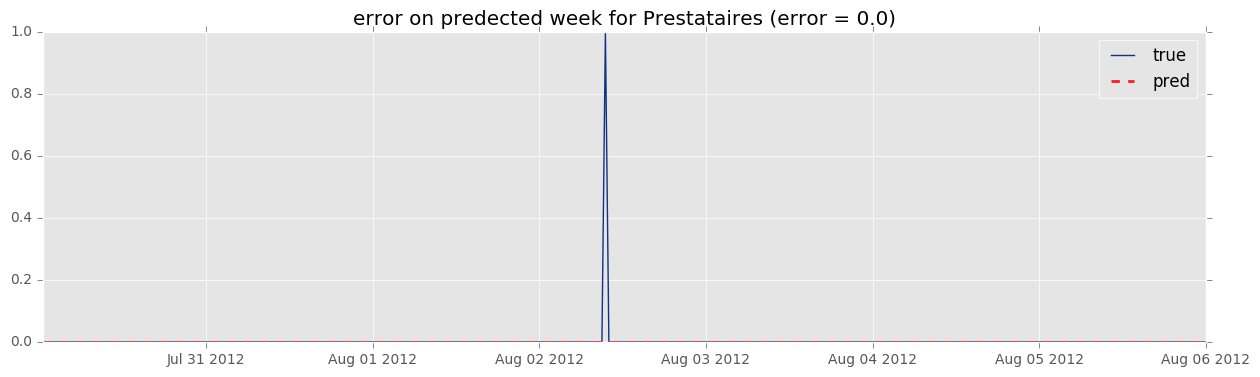

In [125]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Regressor, GS):
    
    y_train_reg = {}
    y_test_reg = {}
    y_pred_reg = {}
    reg = {}
    error = 0
    
    for cat in data.ASS_ASSIGNMENT.unique():
        #print('%s' %cat.decode('utf-8'))
        if cat not in ['Evenements','Gestion Amex']:
            #print('------------------------------------------------')
            # Spliting data for cross validation
            train_is, test_is = skf_is
            
            # test/train definition
            X_train_df = X_df.iloc[train_is].copy()
            # for prediction only use general features such as date and time and category last week data
            #base_col = ['year','month','day','hour','min','workingday','holiday','weekday','night']
            #filter_col = [col for col in list(X_train_df) if (col.startswith(cat.decode('utf-8')) or col in base_col)]
            #X_train_df = X_train_df[filter_col]
            y_train_df = y_df.iloc[train_is].copy()
            X_test_df = X_df.iloc[test_is].copy()
            #X_test_df = X_test_df[filter_col]
            y_test_df = y_df.iloc[test_is].copy()
            
            
            # for téléphonie only use last 6 month because data range to vary a lot each year
            if cat in ['Téléphonie','Tech. Axa','CAT']: #'Tech. Axa','CAT'
                X_train_df = X_train_df.last('3m')
                y_train_df = y_train_df.last('3m')

            # label category definition
            y_train_reg[cat] = y_train_df[cat].values
            y_test_reg[cat] = y_test_df[cat].values
            #print("Done.")

            # Features extraction (no modification of data in this case)
            #print("Exctracting features ..."),
            fe_reg = FeatureExtractor()
            fe_reg.fit(X_train_df, y_train_df)
            X_train_array_reg = fe_reg.transform(X_train_df)
            X_test_array_reg = fe_reg.transform(X_test_df)
            #print("Done.")

            # Train
            # regressors initialisation
            reg[cat] = Regressor()

            # grid search to calibrate model before fitting (if set to True in function)
            if GS :
                if cat in ['Tech. Axa','Téléphonie','CAT']:
                    reg[cat].grid_search_fit(X_train_array_reg, y_train_reg[cat])

            # fitting model
            #print("Training algorithm for %s..." %cat.decode('utf-8')),
            reg[cat].fit(X_train_array_reg, y_train_reg[cat])
            #print("Done.")

            # Test
            #print("Testing algorithm for %s..." %cat.decode('utf-8')),
            y_pred_reg[cat] = np.round(np.maximum(reg[cat].predict(X_test_array_reg,cat),0),0)            
            error_tmp = ef.linex_loss(y_pred_reg[cat], y_test_reg[cat])
            error += error_tmp

            #print("Done.")
            print('error %s = %.1f' %(cat.decode('utf-8'),error_tmp))
            
            # plot figure for predicted week
            y_test_plt = pd.DataFrame(index = y_test_df.index)
            y_test_plt[cat.decode('utf-8')] = y_test_reg[cat]
            y_pred_plt = pd.DataFrame(index = y_test_df.index)
            y_pred_plt[cat.decode('utf-8')] = y_pred_reg[cat]
            
            fig = plt.figure(figsize=[15,4])
            plt.style.use('ggplot')
            plt.plot(y_test_plt[cat.decode('utf-8')], color = blue_AXA)
            plt.plot(y_pred_plt[cat.decode('utf-8')], linestyle = 'dashed', color=red_AXA, linewidth=2)
            plt.title('error on predected week for %s (error = %.1f)' %(cat.decode('utf-8'),error_tmp))
            plt.legend(['true','pred'],loc='best')
            fig.savefig('plots/Pred_appels_categorie_%s.png' %(cat),bbox_inches='tight')
            
            #print('\n------------------------------------------------')
        #else:
            #print("pass.")
            #print('------------------------------------------------')
    k = X_train_df.shape[0]+X_test_df.shape[0]
    l = X_train_df.shape[0]
    print('train sample size %% total sample size = %.2f%%' %(100*float(l)/k))
    print('error = %.1f' %(error))

# define training set
X_train = format_train(y_df)
#X_train, y_df = add_features(X_train, y_df)
# splitting sample for CV : 
# take a radom part of the train sample (at least 50% of the original data size) and the last week to test results
X_train_1, X_train_CV = split_data(X_train)

# to avoid numerical problems, each values of the features is defined as a new feature
X_train_1 = pd.get_dummies(data=X_train_1, columns=['year', 'month','day','hour','min','dayweek'])
X_train_CV = pd.get_dummies(data=X_train_CV, columns=['year', 'month','day','hour','min','dayweek'])

a = X_train_1.shape[0]
b = X_train_CV.shape[0]
skf_is = ([np.arange(a-b).astype(int),np.arange(a-b,a).astype(int)])

train_test_model_clf(X_train_1, y_df, skf_is, FeatureExtractor, Regressor, False)

## Submission prediction

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def train_test_model_clf(X_train, X_test, y_train, FeatureExtractor, submission, sub_i):
    
    y_train_reg = {}
    y_test_reg = {}
    reg = {}
    y_pred_reg = {}
    error = 0
    y_pred = np.zeros((submission.shape[0]))
    
    for cat in submission.ASS_ASSIGNMENT.unique():
        print('%s' %cat.decode('utf-8'))
        if cat not in ['Evenements','Gestion Amex']:
            print('------------------------------------------------')

            # test/train definition  
            X_train_df = X_train.copy()
            y_train_df = y_train.copy()
            X_test_df = X_test.copy()
            
            #base_col = ['year','month','day','hour','min','workingday','holiday','weekday','night']
            #filter_col = [col for col in list(X_train_df) if (col.startswith(cat.decode('utf-8')) or col in base_col)]          
            #X_test_df = X_test_df[filter_col]
            #X_train_df = X_train_df[filter_col]
            
            if cat in ['Téléphonie','Tech. Axa','CAT']: #'Tech. Axa','CAT'
                X_train_df = X_train_df.last('3m')
                y_train_df = y_train_df.last('3m')

            # cat definition
            y_train_reg[cat] = y_train_df[cat].values
            print("Done.")

            # Features extraction (no modification of data in this case)
            print("Exctracting features ..."),
            fe_reg = FeatureExtractor()
            fe_reg.fit(X_train_df, y_train_df)
            X_train_array_reg = fe_reg.transform(X_train_df)
            X_test_array_reg = fe_reg.transform(X_test_df)
            print("Done.")

            # Train
            print("Training algorithm for %s..." %cat.decode('utf-8')),
            # regressors initialisation
            reg[cat] = Regressor()
            print('...'),

            # uncomment to perform grid search to calibrate model before fitting
            #if cat in ['Tech. Axa','Téléphonie','CAT']:
            #    reg[cat].grid_search_fit(X_train_array_reg, y_train_reg[cat])

            # fitting model
            reg[cat].fit(X_train_array_reg, y_train_reg[cat])            
            print("Done.")
            print('\n------------------------------------------------')
        else:
            print("pass.")
            print('------------------------------------------------')
    
    rep = pd.DataFrame(index = submission.index)
    rep['DATE'] = submission.index
    rep['ASS_ASSIGNMENT'] = submission.ASS_ASSIGNMENT
    i = 0
    
    for index, row in rep.iterrows():
        cat = row['ASS_ASSIGNMENT']
        y_pred[i] = reg[cat].predict(X_test.loc[index], cat)[0].astype(int)
        i+=1
    rep['prediction'] = np.maximum(y_pred.astype(int),0)
    #rep['DATE'] = [dd + ".000" for dd in rep['DATE']]
    print("saved in file")
    
    rep.to_csv("documentation/Submission_data/submission_test_%i.txt" %sub_i, sep="\t", index=False)

X_test = {}
X_train_sub = {}
y_df_sub = {}

X_train = format_train()
for k in range (1,12):
    print(k)
    # formating data from the submission file
    X_test[k] = format_subission(submission[k])
    # removing data from the train set anterior to data from submission set
    X_train_sub[k], y_df_sub[k] = remove_ant(X_train, X_test[k], y_df)
    X_train_sub[k] = pd.get_dummies(data=X_train_sub[k], columns=['year', 'month','day','hour','min','dayweek'])
    train_test_model_clf(X_train_sub[k], X_test[k], y_df_sub[k], FeatureExtractor, submission[k], k)

train data first date : 2011-01-01 00:00:00
train data last date  : 2013-12-31 23:30:00
train data range : 2 years, 11 months and 30 days

1
test data first date : 2012-12-28 00:00:00
test data last date  : 2013-01-03 23:30:00
test data range : 0 years, 0 months and 6 days

train data first date : 2011-01-01 00:00:00
train data last date  : 2012-12-27 23:30:00
train data range : 1 years, 11 months and 26 days

CMS
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for CMS... ... Done.

------------------------------------------------
Crises
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for Crises... ... Done.

------------------------------------------------
Domicile
------------------------------------------------
Done.
Exctracting features ... Done.
Training algorithm for Domicile... ... Done.

------------------------------------------------
Gestion
----------------------

In [61]:
# data_files = ['file2.csv', 'file3.csv']
df = pd.read_csv('documentation/Submission_data/submission_1.txt')
#for el in data_files:
for i in range(2,13):
    df_tmp = pd.read_csv('documentation/Submission_data/submission_%i.txt' %i)    
    df = df.append(df_tmp)
    # print(df.shape)
df.to_csv('documentation/Submission_data/submission_test.txt', index = False)

In [62]:
input_file = "submission_test.txt"
output_file = "submission_test_modif.txt"

modif = pd.read_csv(input_file, sep="\t")
print("File read.")
modif['DATE'] = [dd + ".000" for dd in modif['DATE']]
print("Data modified.")
modif.to_csv(output_file, sep="\t", index=False)
print("All done.")


File read.
Data modified.
All done.
